# SUPPORT VECTOR MACHINE

## Dataset Selection:
For this assignment, we'll utilize the widely recognized Mushroom Dataset


### Task 1 Exploratory Data Analysis (EDA) :
1.	Load the Mushroom dataset and perform fundamental data exploration.
2.	Utilize histograms, box plots, or density plots to understand feature distributions.
3.	Investigate feature correlations to discern relationships within the data.


In [1]:
# Import the Required Libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load and Read the dataset.
df=pd.read_csv('mushroom.csv')
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [4]:
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [5]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [6]:
df=df.drop(columns=["Unnamed: 0"])

#### Feature distributions using Histograms.

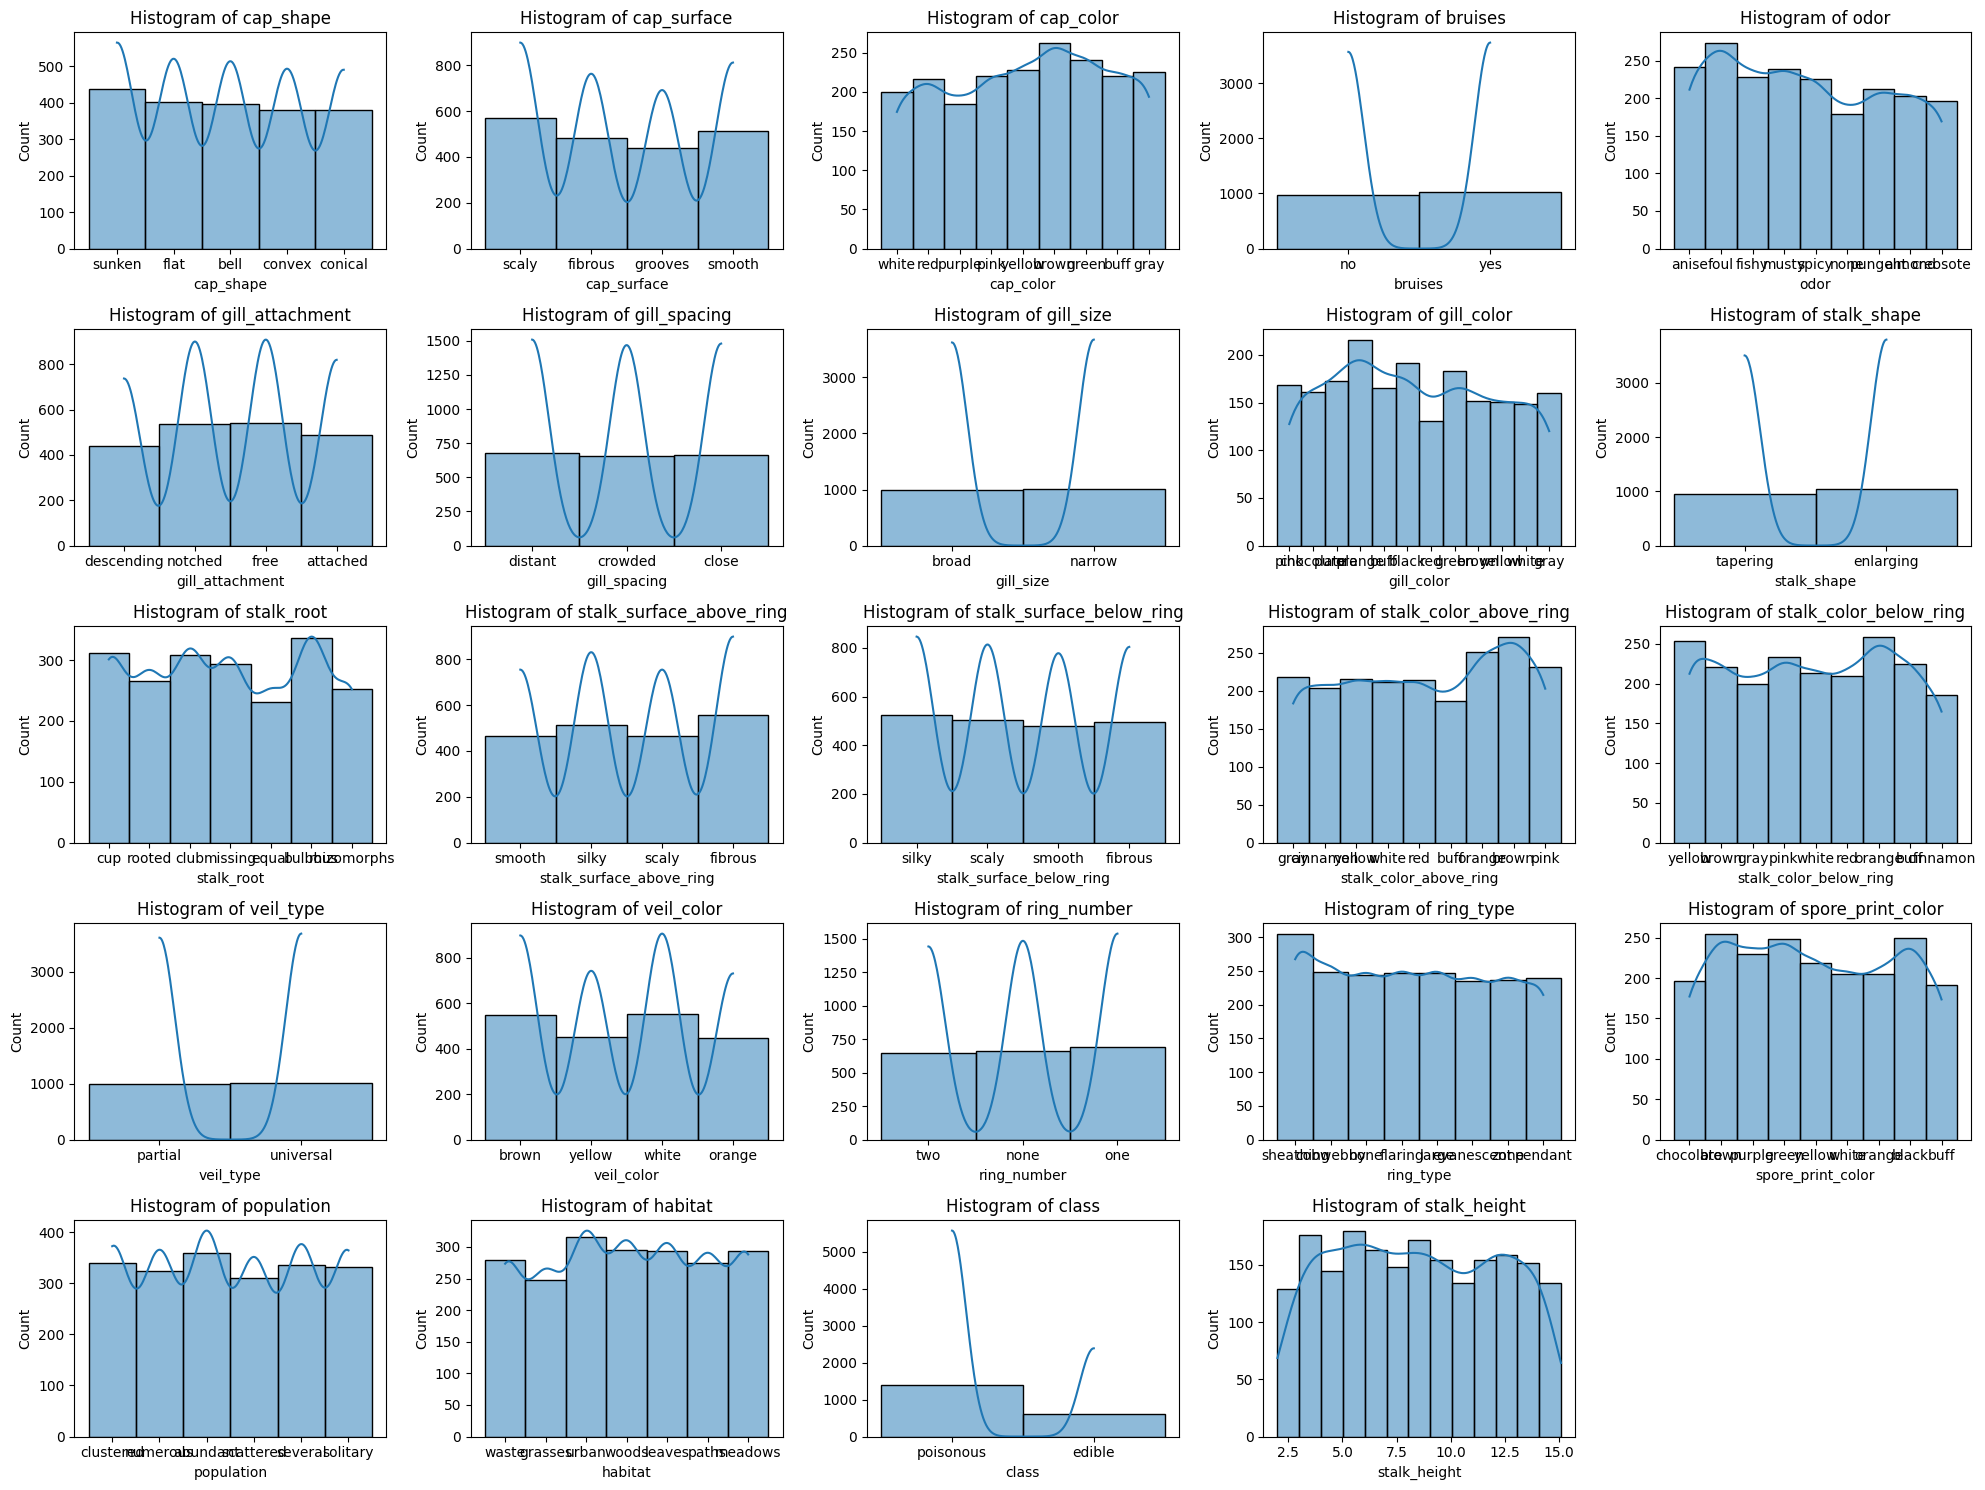

In [7]:
plt.figure(figsize=(20,15))
for i,col in enumerate(df.columns[:-1],1):
    plt.subplot(5,5,i)
    sns.histplot(df[col],kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

In [8]:
df.isnull().sum()

,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0
stalk_shape,0


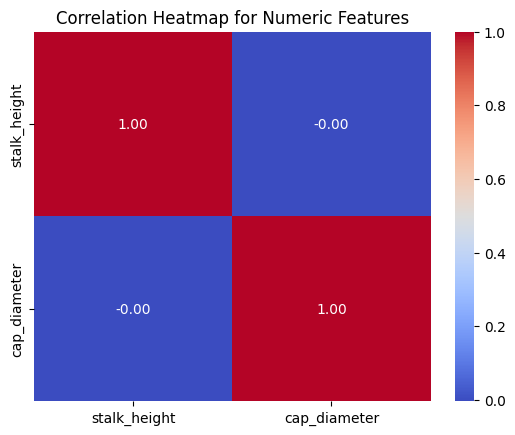

In [9]:
# Correlation heatmap for numeric features
numeric_corr=df[['stalk_height','cap_diameter']].corr()
sns.heatmap(numeric_corr,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap for Numeric Features")
plt.show()

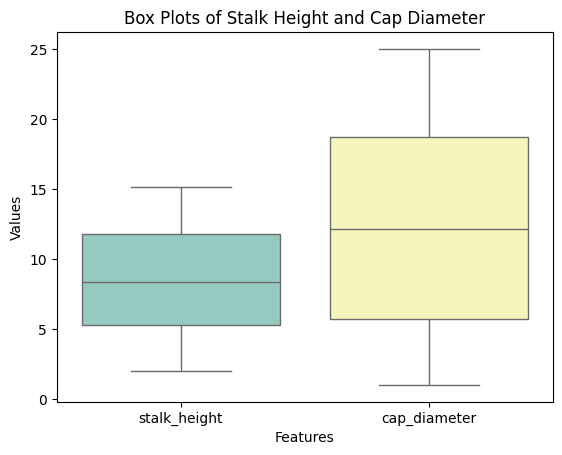

In [10]:
# Box plots
sns.boxplot(data=df[['stalk_height','cap_diameter']],palette="Set3")
plt.title("Box Plots of Stalk Height and Cap Diameter")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

<ipython-input-11-b2b1bc1c417e>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['stalk_height'],shade=True,color="orange",label="Stalk Height")
<ipython-input-11-b2b1bc1c417e>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['cap_diameter'],shade=True,color="green",label="Cap Diameter")


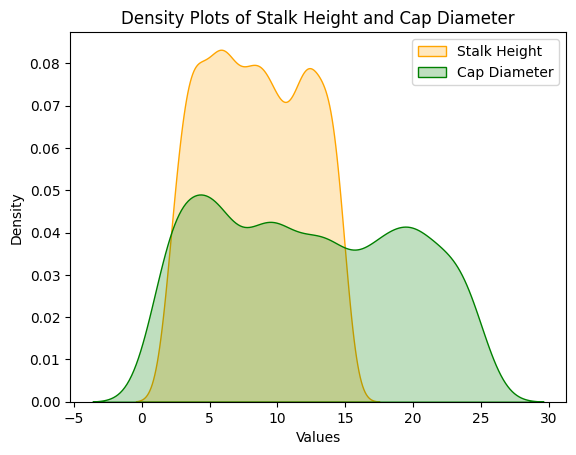

In [11]:
# Density plots
sns.kdeplot(df['stalk_height'],shade=True,color="orange",label="Stalk Height")
sns.kdeplot(df['cap_diameter'],shade=True,color="green",label="Cap Diameter")
plt.title("Density Plots of Stalk Height and Cap Diameter")
plt.xlabel("Values")
plt.ylabel("Density")
plt.legend()
plt.show()


### Task 2: Data Preprocessing
1.	Encode categorical variables if necessary.
2.	Split the dataset into training and testing sets.


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [13]:
# Encode categorical variables
label_encoders={}
for col in df.select_dtypes(include=["object"]).columns:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])
    label_encoders[col]=le

In [14]:
# Split into features (X) and target (y)
X=df.drop(columns=["class"])
y=df["class"]

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Task 3: Data Visualization
1.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.
2.	Visualize class distributions to gauge dataset balance or imbalance.


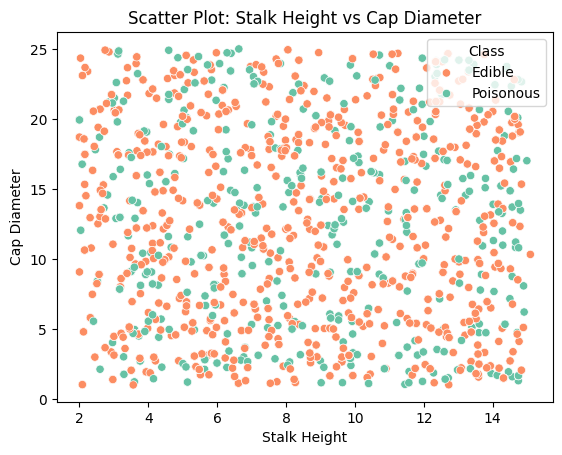

In [16]:
# Scatter plot for numerical features.
sns.scatterplot(x="stalk_height",y="cap_diameter",hue="class",data=df,palette="Set2")
plt.title("Scatter Plot: Stalk Height vs Cap Diameter")
plt.xlabel("Stalk Height")
plt.ylabel("Cap Diameter")
plt.legend(title="Class",labels=["Edible","Poisonous"])
plt.show()

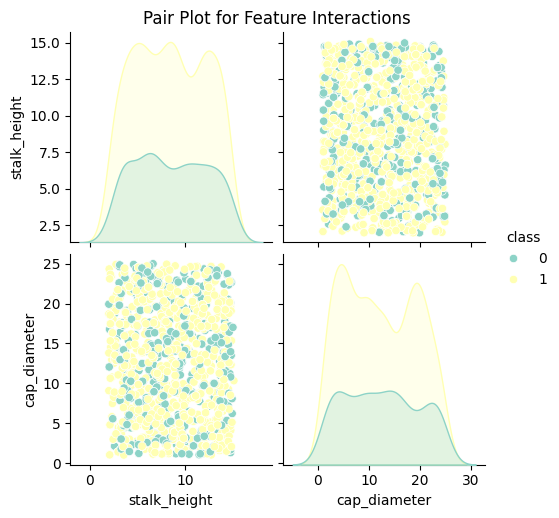

In [17]:
# Pair plot for selected features.
sns.pairplot(df,vars=["stalk_height","cap_diameter"],hue="class",palette="Set3",diag_kind="kde")
plt.suptitle("Pair Plot for Feature Interactions",y=1.02)
plt.show()

<ipython-input-18-da7d56a574e3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="class",data=df,palette="muted")


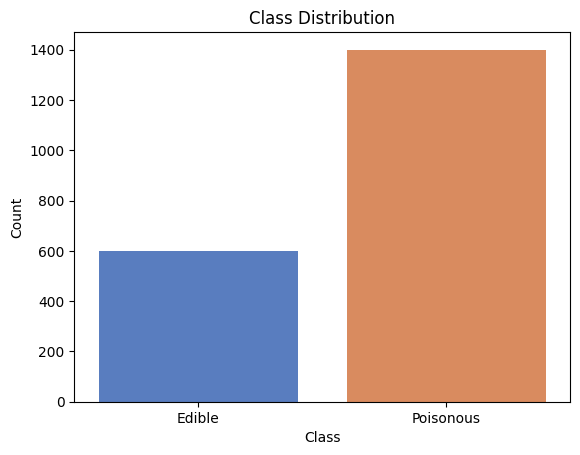

In [18]:
# Class distribution.
sns.countplot(x="class",data=df,palette="muted")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=[0,1],labels=["Edible","Poisonous"])
plt.show()

### Task 4: SVM Implementation
1.	Implement a basic SVM classifier using Python libraries like scikit-learn.
2.	Train the SVM model on the training data.
3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).


In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix

In [20]:
# Initialize SVM model.
svm_model=SVC(kernel='linear',random_state=42)
# Train the model on the training data.
svm_model.fit(X_train, y_train)
y_pred=svm_model.predict(X_test)

# Evaluate the model
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,pos_label=1)
recall=recall_score(y_test,y_pred,pos_label=1)
f1=f1_score(y_test,y_pred,pos_label=1)

##### Model Evaluation Metrics.

In [21]:
print(f"Accuracy:{accuracy:.2f}")
print(f"Precision:{precision:.2f}")
print(f"Recall:{recall:.2f}")
print(f"F1-Score:{f1:.2f}")

Accuracy:0.67
Precision:0.67
Recall:1.00
F1-Score:0.80


In [22]:
# Detailed classification report.
print("\nClassification Report:")
print(classification_report(y_test,y_pred,target_names=["Edible", "Poisonous"]))
# Confusion matrix.
print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred))


Classification Report:
              precision    recall  f1-score   support

      Edible       0.00      0.00      0.00       133
   Poisonous       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400


Confusion Matrix:
[[  0 133]
 [  0 267]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Task 5: Visualization of SVM Results
1.	Visualize classification results on the testing data.


In [23]:
from matplotlib.colors import ListedColormap

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


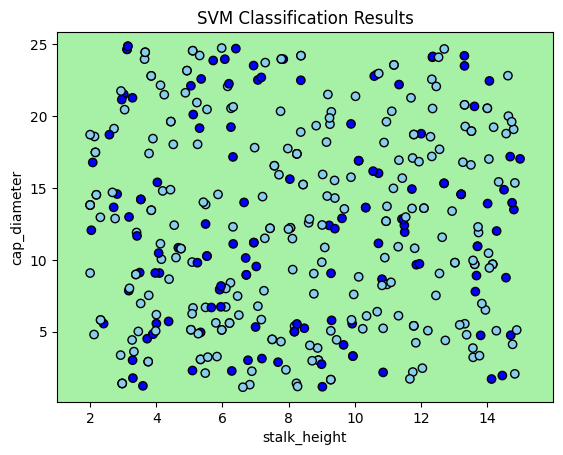

In [24]:
# Function to visualize SVM decision boundary.
def plot_decision_boundary(X,y,model,title="SVM Classification Results"):
    # Create a mesh grid for plotting.
    x_min,x_max=X.iloc[:,0].min()-1,X.iloc[:,0].max()+1
    y_min,y_max= X.iloc[:,1].min()-1,X.iloc[:,1].max()+1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01))

    # Predict classes for each point in the grid.
    Z=model.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    # Create a color map.
    cmap=ListedColormap(['lightgreen','lightcoral'])
    # Plot decision boundary.
    plt.contourf(xx,yy,Z,alpha=0.8,cmap=cmap)
    # Plot actual points.
    plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y,edgecolors='k',cmap=ListedColormap(['blue','skyblue']))
    plt.title(title)
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.show()

# Select two numeric features for visualization.
X_test_numeric=X_test[['stalk_height','cap_diameter']]
y_test_numeric=y_test

# Train a new SVM model on the selected features.
svm_model_simple=SVC(kernel='linear',random_state=42)
svm_model_simple.fit(X_train[['stalk_height','cap_diameter']],y_train)

# Visualize decision boundary.
plot_decision_boundary(X_test_numeric,y_test_numeric,svm_model_simple)


### Task 6: Parameter Tuning and Optimization
1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.


In [25]:
import warnings
warnings.filterwarnings("ignore")

In [26]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [28]:
clf=SVC()
param_grid=[{'kernel':['rbf','polynomial','radial'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv=GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)
gsv.best_params_ ,gsv.best_score_

({'C': 15, 'gamma': 50, 'kernel': 'rbf'}, 0.865)

### Task 7: Comparison and Analysis
1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).
2.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.
3.	Discuss practical implications of SVM in real-world classification tasks.


In [29]:
# Compare SVM performance with different kernels
for kernel in ['linear','poly','rbf']:
    svm_classifier=SVC(kernel=kernel,C=1.0,random_state=42)
    svm_classifier.fit(X_train,y_train)
    y_pred=svm_classifier.predict(X_test)
    print(f"Kernel:{kernel}")
    print("Classification Report:\n",classification_report(y_test,y_pred))
    print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))


Kernel:linear
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400

Confusion Matrix:
 [[  0 133]
 [  0 267]]
Kernel:poly
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.08      0.14       133
           1       0.68      1.00      0.81       267

    accuracy                           0.69       400
   macro avg       0.84      0.54      0.48       400
weighted avg       0.79      0.69      0.59       400

Confusion Matrix:
 [[ 10 123]
 [  0 267]]
Kernel:rbf
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80 

### Comparison of SVM Kernels :
Linear Kernel : Ideal for linearly separable datasets; it's quick and efficient.
Polynomial Kernel : Handles more intricate relationships, making it suitable for non-linear data patterns.
RBF Kernel : Highly adaptable, excelling at modeling complex, non-linear boundaries.
### Strengths and Weaknesses of SVM:
Strengths:

Performs well in high-dimensional spaces.
Offers flexibility through various kernel choices.Resilient to overfitting, especially in well-regularized models.

Weaknesses:

Requires careful tuning of parameters and proper feature scaling.
Challenging to interpret.
Computationally intensive for very large datasets.
### Practical Considerations:
SVM is a powerful tool for diverse applications, including text classification, image recognition, and bioinformatics.
It works best with small to medium-sized datasets featuring high-dimensional inputs.Scalability issues and high computational demands make it less suitable for extremely large datasets.